In [1]:

!pip install openpyxl pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 46.8 MB/s eta 0:00:00


In [2]:

import pandas as pd
from spellchecker import SpellChecker
from IPython.display import display

# Replace 'your_file.xlsx' with the actual name of your uploaded file
file_path = 'Komentar Najwa Sihab.xlsx'
df = pd.read_excel(file_path)
display(df)

,comments,username
0,Pak tolong PPN pajaknya di turunin soalnya say...,sofwati79
1,Smg sehat dan panjang umur pak presiden🔥,hidayatulummah3
2,Barng mewah untuk kalangan apa pak 😢 apakah ka...,wnddesign
3,Masa 🫣,strarawberries
4,la nggeh ngoten,damara.day
...,...,...
1629,Usaha rike di tangapi dasco yg yg kena pajak ...,duni4_may4
1630,Barang mewah adalah ………. \nYang termasuk baran...,wigiyantz
1631,Lebih ke kendaraan mungkin kalo hp sudah ada P...,mhd_rihilmiski493
1632,"Semoga benar yg disasar orang kaya, krn pasti ...",adputra99


Normalisasi (Spelling) & Case Folding (LowerCase)

In [3]:
import pandas as pd
import re

# Load data from Excel
file_path = "Komentar Najwa Sihab.xlsx"  # Ubah dengan lokasi file Anda
data = pd.read_excel(file_path)

# Define spelling correction dictionary
spelling_corrections = {
    r'\budh\b': 'sudah',
    r'\bkrn\b': 'karena',
    r'\bdlm\b': 'dalam',
    r'\bdpt\b': 'dapat',
    r'\byg\b': 'yang',
    r'\bklo\b': 'kalau',
    r'\btrsedia\b': 'tersedia',
    r'\btrsdia\b': 'tersedia',
    r'\btersdia\b': 'tersedia',
    r'\btdk\b': 'tidak',
    r'\bsmg\b': 'semoga',
    r'\btlg\b': 'tolong'
}

# Function to correct spelling
def correct_spelling(comment):
    comment = str(comment).lower()
    for pattern, replacement in spelling_corrections.items():
        comment = re.sub(pattern, replacement, comment)
    return comment

# Apply spelling correction
data["Corrected_Comments"] = data["comments"].apply(correct_spelling)

# Display the resulting table
display(data[["comments", "Corrected_Comments"]])


,comments,Corrected_Comments
0,Pak tolong PPN pajaknya di turunin soalnya say...,pak tolong ppn pajaknya di turunin soalnya say...
1,Smg sehat dan panjang umur pak presiden🔥,semoga sehat dan panjang umur pak presiden🔥
2,Barng mewah untuk kalangan apa pak 😢 apakah ka...,barng mewah untuk kalangan apa pak 😢 apakah ka...
3,Masa 🫣,masa 🫣
4,la nggeh ngoten,la nggeh ngoten
...,...,...
1629,Usaha rike di tangapi dasco yg yg kena pajak ...,usaha rike di tangapi dasco yang yang kena pa...
1630,Barang mewah adalah ………. \nYang termasuk baran...,barang mewah adalah ………. \nyang termasuk baran...
1631,Lebih ke kendaraan mungkin kalo hp sudah ada P...,lebih ke kendaraan mungkin kalo hp sudah ada p...
1632,"Semoga benar yg disasar orang kaya, krn pasti ...","semoga benar yang disasar orang kaya, karena p..."


Tokenizing

In [4]:

import pandas as pd
from spellchecker import SpellChecker
from IPython.display import display
import re

# Assuming 'data' DataFrame is already loaded as in the previous code

# Tokenization function
def tokenize(text):
    text = re.sub(r'[^\w\s]', '', str(text)) # Remove punctuation
    tokens = text.lower().split()
    return tokens

# Apply tokenization
data['tokens'] = data['Corrected_Comments'].apply(tokenize)

# Display the DataFrame with tokens
display(data[['comments', 'Corrected_Comments', 'tokens']])

,comments,Corrected_Comments,tokens
0,Pak tolong PPN pajaknya di turunin soalnya say...,pak tolong ppn pajaknya di turunin soalnya say...,"[pak, tolong, ppn, pajaknya, di, turunin, soal..."
1,Smg sehat dan panjang umur pak presiden🔥,semoga sehat dan panjang umur pak presiden🔥,"[semoga, sehat, dan, panjang, umur, pak, presi..."
2,Barng mewah untuk kalangan apa pak 😢 apakah ka...,barng mewah untuk kalangan apa pak 😢 apakah ka...,"[barng, mewah, untuk, kalangan, apa, pak, apak..."
3,Masa 🫣,masa 🫣,[masa]
4,la nggeh ngoten,la nggeh ngoten,"[la, nggeh, ngoten]"
...,...,...,...
1629,Usaha rike di tangapi dasco yg yg kena pajak ...,usaha rike di tangapi dasco yang yang kena pa...,"[usaha, rike, di, tangapi, dasco, yang, yang, ..."
1630,Barang mewah adalah ………. \nYang termasuk baran...,barang mewah adalah ………. \nyang termasuk baran...,"[barang, mewah, adalah, yang, termasuk, barang..."
1631,Lebih ke kendaraan mungkin kalo hp sudah ada P...,lebih ke kendaraan mungkin kalo hp sudah ada p...,"[lebih, ke, kendaraan, mungkin, kalo, hp, suda..."
1632,"Semoga benar yg disasar orang kaya, krn pasti ...","semoga benar yang disasar orang kaya, karena p...","[semoga, benar, yang, disasar, orang, kaya, ka..."


Filtering

In [5]:

# Assuming 'data' DataFrame is already loaded and processed as in the previous code

# Example filtering: Remove comments containing specific words
stop_words = ['kata', 'yang', 'tidak', 'ini']  # Add your stop words here

def filter_comments(tokens):
    return [word for word in tokens if word not in stop_words]

data['filtered_tokens'] = data['tokens'].apply(filter_comments)

# Display the DataFrame with filtered tokens
display(data[['comments', 'Corrected_Comments', 'tokens', 'filtered_tokens']])


# Further filtering example: Remove comments shorter than a certain length
min_length = 3  # Minimum number of tokens

def filter_by_length(tokens):
  return tokens if len(tokens) >= min_length else []

data['filtered_tokens_length'] = data['filtered_tokens'].apply(filter_by_length)
display(data[['comments', 'Corrected_Comments', 'tokens', 'filtered_tokens', 'filtered_tokens_length']])

columns_to_download = ['comments', 'Corrected_Comments', 'filtered_tokens_length']
# You can modify this list to include other relevant columns

# Create a new DataFrame with the selected columns
filtered_data_to_download = data[columns_to_download]

# Save the DataFrame to an XLSX file
filtered_data_to_download.to_excel('filtered_comments.xlsx', index=False)

print("Filtered data downloaded to filtered_comments.xlsx")

,comments,Corrected_Comments,tokens,filtered_tokens
0,Pak tolong PPN pajaknya di turunin soalnya say...,pak tolong ppn pajaknya di turunin soalnya say...,"[pak, tolong, ppn, pajaknya, di, turunin, soal...","[pak, tolong, ppn, pajaknya, di, turunin, soal..."
1,Smg sehat dan panjang umur pak presiden🔥,semoga sehat dan panjang umur pak presiden🔥,"[semoga, sehat, dan, panjang, umur, pak, presi...","[semoga, sehat, dan, panjang, umur, pak, presi..."
2,Barng mewah untuk kalangan apa pak 😢 apakah ka...,barng mewah untuk kalangan apa pak 😢 apakah ka...,"[barng, mewah, untuk, kalangan, apa, pak, apak...","[barng, mewah, untuk, kalangan, apa, pak, apak..."
3,Masa 🫣,masa 🫣,[masa],[masa]
4,la nggeh ngoten,la nggeh ngoten,"[la, nggeh, ngoten]","[la, nggeh, ngoten]"
...,...,...,...,...
1629,Usaha rike di tangapi dasco yg yg kena pajak ...,usaha rike di tangapi dasco yang yang kena pa...,"[usaha, rike, di, tangapi, dasco, yang, yang, ...","[usaha, rike, di, tangapi, dasco, kena, pajak,..."
1630,Barang mewah adalah ………. \nYang termasuk baran...,barang mewah adalah ………. \nyang termasuk baran...,"[barang, mewah, adalah, yang, termasuk, barang...","[barang, mewah, adalah, termasuk, barang, mewa..."
1631,Lebih ke kendaraan mungkin kalo hp sudah ada P...,lebih ke kendaraan mungkin kalo hp sudah ada p...,"[lebih, ke, kendaraan, mungkin, kalo, hp, suda...","[lebih, ke, kendaraan, mungkin, kalo, hp, suda..."
1632,"Semoga benar yg disasar orang kaya, krn pasti ...","semoga benar yang disasar orang kaya, karena p...","[semoga, benar, yang, disasar, orang, kaya, ka...","[semoga, benar, disasar, orang, kaya, karena, ..."


,comments,Corrected_Comments,tokens,filtered_tokens,filtered_tokens_length
0,Pak tolong PPN pajaknya di turunin soalnya say...,pak tolong ppn pajaknya di turunin soalnya say...,"[pak, tolong, ppn, pajaknya, di, turunin, soal...","[pak, tolong, ppn, pajaknya, di, turunin, soal...","[pak, tolong, ppn, pajaknya, di, turunin, soal..."
1,Smg sehat dan panjang umur pak presiden🔥,semoga sehat dan panjang umur pak presiden🔥,"[semoga, sehat, dan, panjang, umur, pak, presi...","[semoga, sehat, dan, panjang, umur, pak, presi...","[semoga, sehat, dan, panjang, umur, pak, presi..."
2,Barng mewah untuk kalangan apa pak 😢 apakah ka...,barng mewah untuk kalangan apa pak 😢 apakah ka...,"[barng, mewah, untuk, kalangan, apa, pak, apak...","[barng, mewah, untuk, kalangan, apa, pak, apak...","[barng, mewah, untuk, kalangan, apa, pak, apak..."
3,Masa 🫣,masa 🫣,[masa],[masa],[]
4,la nggeh ngoten,la nggeh ngoten,"[la, nggeh, ngoten]","[la, nggeh, ngoten]","[la, nggeh, ngoten]"
...,...,...,...,...,...
1629,Usaha rike di tangapi dasco yg yg kena pajak ...,usaha rike di tangapi dasco yang yang kena pa...,"[usaha, rike, di, tangapi, dasco, yang, yang, ...","[usaha, rike, di, tangapi, dasco, kena, pajak,...","[usaha, rike, di, tangapi, dasco, kena, pajak,..."
1630,Barang mewah adalah ………. \nYang termasuk baran...,barang mewah adalah ………. \nyang termasuk baran...,"[barang, mewah, adalah, yang, termasuk, barang...","[barang, mewah, adalah, termasuk, barang, mewa...","[barang, mewah, adalah, termasuk, barang, mewa..."
1631,Lebih ke kendaraan mungkin kalo hp sudah ada P...,lebih ke kendaraan mungkin kalo hp sudah ada p...,"[lebih, ke, kendaraan, mungkin, kalo, hp, suda...","[lebih, ke, kendaraan, mungkin, kalo, hp, suda...","[lebih, ke, kendaraan, mungkin, kalo, hp, suda..."
1632,"Semoga benar yg disasar orang kaya, krn pasti ...","semoga benar yang disasar orang kaya, karena p...","[semoga, benar, yang, disasar, orang, kaya, ka...","[semoga, benar, disasar, orang, kaya, karena, ...","[semoga, benar, disasar, orang, kaya, karena, ..."


Filtered data downloaded to filtered_comments.xlsx


Jumlah Komentar
Sentimen Positif dan negatif dari !wget https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv
!wget https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv
scoring terbanyak itu adalah hasil sentimen

In [6]:


import pandas as pd

# Load the positive and negative word lists
positive_words = pd.read_csv('positive.tsv', sep='\t', header=None)[0].tolist()
negative_words = pd.read_csv('negative.tsv', sep='\t', header=None)[0].tolist()

def calculate_sentiment_score(tokens):
    positive_score = 0
    negative_score = 0
    for token in tokens:
        if token in positive_words:
            positive_score += 1
        elif token in negative_words:
            negative_score += 1
    return positive_score, negative_score

def classify_sentiment(positive_score, negative_score):
    if positive_score > negative_score:
        return "Positif"
    elif negative_score > positive_score:
        return "Negatif"
    else:
        return "Netral"

# Assuming 'data' DataFrame is already loaded and processed
data['positive_score'], data['negative_score'] = zip(*data['filtered_tokens_length'].apply(calculate_sentiment_score))
data['sentiment'] = data.apply(lambda row: classify_sentiment(row['positive_score'], row['negative_score']), axis=1)

sentiment_counts = data['sentiment'].value_counts()

# Print the counts
print("Sentiment Counts:")
print(sentiment_counts)
# Display the DataFrame with sentiment analysis results
display(data[['comments', 'Corrected_Comments', 'filtered_tokens_length', 'positive_score', 'negative_score', 'sentiment']])


# Save the results to a new Excel file
data.to_excel('sentiment_analysis_results.xlsx', index=False)
print("Sentiment analysis results saved to sentiment_analysis_results.xlsx")

Sentiment Counts:
sentiment
Positif    629
Netral     598
Negatif    407
Name: count, dtype: int64


,comments,Corrected_Comments,filtered_tokens_length,positive_score,negative_score,sentiment
0,Pak tolong PPN pajaknya di turunin soalnya say...,pak tolong ppn pajaknya di turunin soalnya say...,"[pak, tolong, ppn, pajaknya, di, turunin, soal...",7,5,Positif
1,Smg sehat dan panjang umur pak presiden🔥,semoga sehat dan panjang umur pak presiden🔥,"[semoga, sehat, dan, panjang, umur, pak, presi...",4,0,Positif
2,Barng mewah untuk kalangan apa pak 😢 apakah ka...,barng mewah untuk kalangan apa pak 😢 apakah ka...,"[barng, mewah, untuk, kalangan, apa, pak, apak...",0,2,Negatif
3,Masa 🫣,masa 🫣,[],0,0,Netral
4,la nggeh ngoten,la nggeh ngoten,"[la, nggeh, ngoten]",0,0,Netral
...,...,...,...,...,...,...
1629,Usaha rike di tangapi dasco yg yg kena pajak ...,usaha rike di tangapi dasco yang yang kena pa...,"[usaha, rike, di, tangapi, dasco, kena, pajak,...",1,2,Negatif
1630,Barang mewah adalah ………. \nYang termasuk baran...,barang mewah adalah ………. \nyang termasuk baran...,"[barang, mewah, adalah, termasuk, barang, mewa...",1,2,Negatif
1631,Lebih ke kendaraan mungkin kalo hp sudah ada P...,lebih ke kendaraan mungkin kalo hp sudah ada p...,"[lebih, ke, kendaraan, mungkin, kalo, hp, suda...",4,1,Positif
1632,"Semoga benar yg disasar orang kaya, krn pasti ...","semoga benar yang disasar orang kaya, karena p...","[semoga, benar, disasar, orang, kaya, karena, ...",3,1,Positif


Sentiment analysis results saved to sentiment_analysis_results.xlsx


Visualisasi

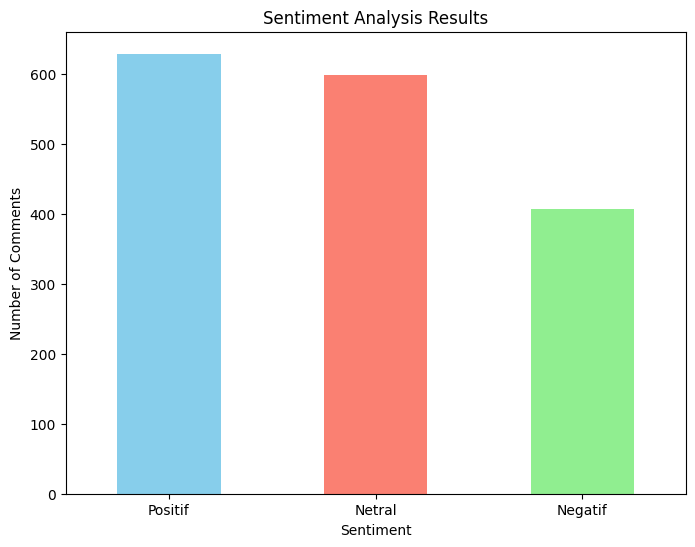

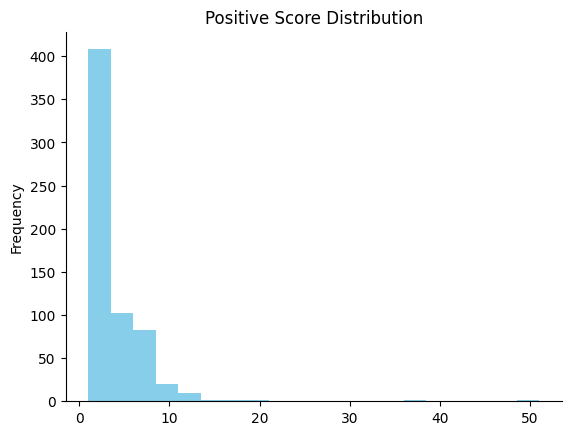

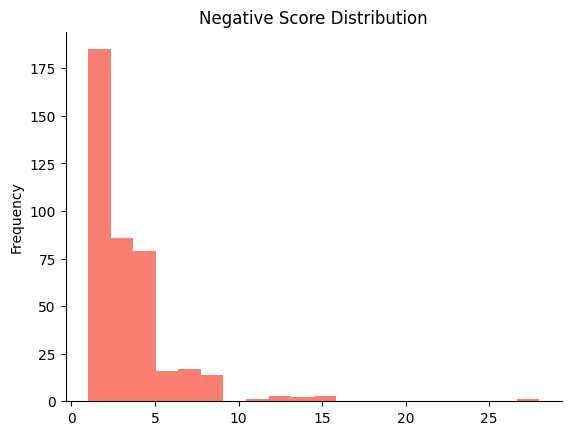

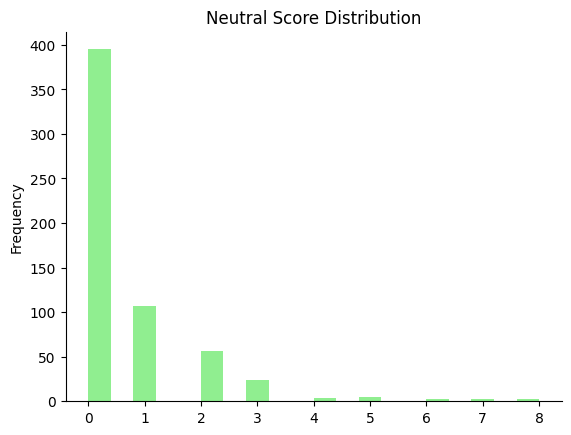

In [21]:

# Create the bar plot
sentiment_counts = data['sentiment'].value_counts()
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

# Create a histogram for positive and negative scores

_positive_data = data[data['sentiment'] == 'Positif']
positive_data['positive_score'].plot(kind='hist', bins=20, title='Positive Score Distribution', color='skyblue')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# Negative sentiment
negative_data = data[data['sentiment'] == 'Negatif']
negative_data['negative_score'].plot(kind='hist', bins=20, title='Negative Score Distribution', color='salmon')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# Neutral sentiment
neutral_data = data[data['sentiment'] == 'Netral']
neutral_data['positive_score'].plot(kind='hist', bins=20, title='Neutral Score Distribution', color='lightgreen') # You can use 'negative_score' as well
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

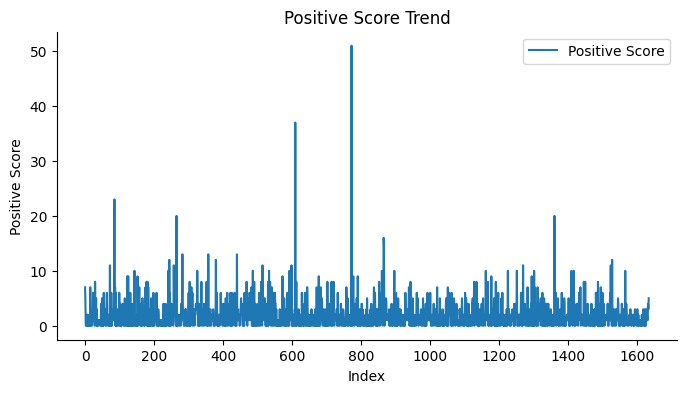

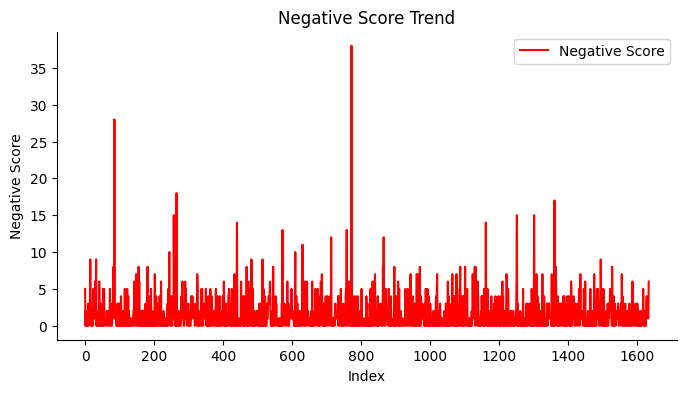

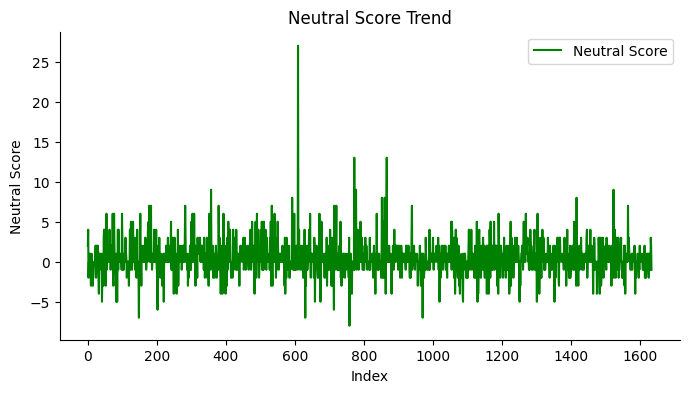

In [35]:
# Visualisasi positive_score
plt.figure(figsize=(8, 4))
plt.plot(data['positive_score'], label='Positive Score')
plt.title('Positive Score Trend')
plt.xlabel('Index')
plt.ylabel('Positive Score')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()
plt.show()

# Visualisasi negative_score
plt.figure(figsize=(8, 4))
plt.plot(data['negative_score'], label='Negative Score', color='red')
plt.title('Negative Score Trend')
plt.xlabel('Index')
plt.ylabel('Negative Score')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()
plt.show()

# Visualisasi neutral_score  # This is the added part
plt.figure(figsize=(8, 4))
plt.plot(data['positive_score'] - data['negative_score'], label='Neutral Score', color='green') # Assuming neutral score is positive - negative
plt.title('Neutral Score Trend')
plt.xlabel('Index')
plt.ylabel('Neutral Score')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()
plt.show()

Visualisasi wordcloud

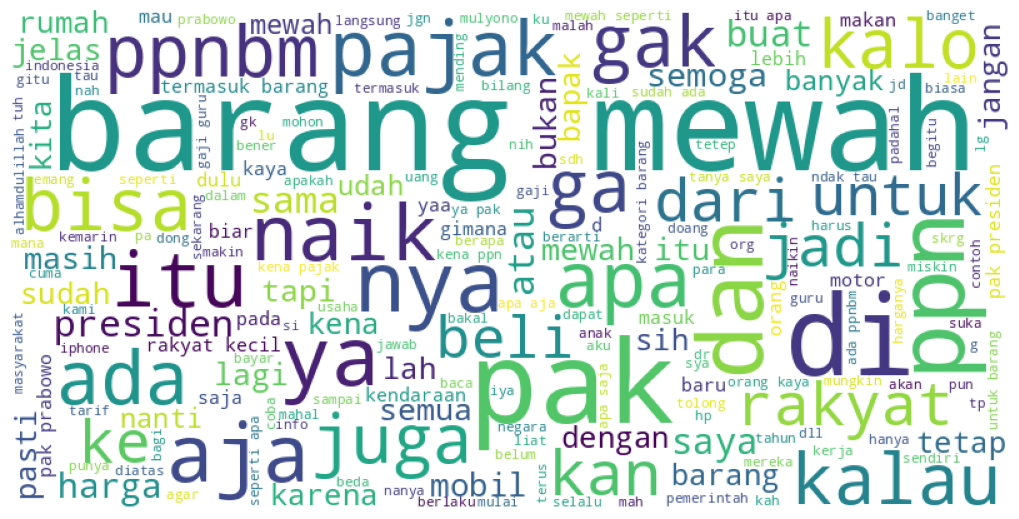

In [23]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame and 'filtered_tokens_length' column exist as in the previous code

# Combine all filtered tokens into a single string
all_tokens = ' '.join([' '.join(tokens) for tokens in data['filtered_tokens_length']])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Frekuensi kemunculan kata TF-IDF

In [24]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# Instead of loading a new DataFrame, use the existing 'data' DataFrame
# which already contains the 'filtered_tokens_length' column
# data = pd.read_excel("Komentar Najwa Sihab.xlsx") # This line is removed

# Ensure that the code to create 'filtered_tokens_length' has been executed before this cell
# If not, you can include the relevant code snippets here or make sure the previous cells are executed in order.
# For example, if the column was created in a previous cell with the following code:
#
# data['tokens'] = data['Corrected_Comments'].apply(tokenize)
# data['filtered_tokens'] = data['tokens'].apply(filter_comments)
# data['filtered_tokens_length'] = data['filtered_tokens'].apply(filter_by_length)
#
# Then you need to make sure that cell is executed before this one.

def word_frequency(tokens_list):
    """
    Calculates the frequency of words in a list of token lists.

    Args:
        tokens_list: A list where each element is a list of tokens (strings).

    Returns:
        A Counter object representing word frequencies.
    """
    all_tokens = [token for sublist in tokens_list for token in sublist]
    word_counts = Counter(all_tokens)
    return word_counts

# Example usage (assuming 'data' and 'filtered_tokens_length' are defined as in your code):
# If 'filtered_tokens_length' column is still missing, re-create it here:
if 'filtered_tokens_length' not in data.columns:
    # Include the necessary functions and code to create this column
    # Example (assuming you have the functions defined elsewhere):
    def tokenize(text):
        text = re.sub(r'[^\w\s]', '', str(text))  # Remove punctuation
        tokens = text.lower().split()
        return tokens

    def filter_comments(tokens):
        stop_words = ['kata', 'yang', 'tidak', 'ini']  # Add your stop words here
        return [word for word in tokens if word not in stop_words]

    def filter_by_length(tokens):
        min_length = 3  # Minimum number of tokens
        return tokens if len(tokens) >= min_length else []

    # Apply the functions to create the column
    data['tokens'] = data['Corrected_Comments'].apply(tokenize)
    data['filtered_tokens'] = data['tokens'].apply(filter_comments)
    data['filtered_tokens_length'] = data['filtered_tokens'].apply(filter_by_length)

word_counts = word_frequency(data['filtered_tokens_length'].tolist())

# Sort the word counts from highest to lowest frequency
sorted_word_counts = word_counts.most_common()

# Print the sorted word frequencies in a table-like format
print("Word\t\tFrequency\tTF-IDF")
print("----\t\t---------\t------")  # Separator line

# Calculate TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([' '.join(tokens) for tokens in data['filtered_tokens_length']])
feature_names = vectorizer.get_feature_names_out()

# Get TF-IDF values for each word
tfidf_values = {word: tfidf_matrix.sum(axis=0)[0, feature_names.tolist().index(word)]
                for word, _ in sorted_word_counts if word in feature_names.tolist()}

# Print word frequencies with TF-IDF
for word, count in sorted_word_counts:
    tfidf = tfidf_values.get(word, 0)  # Get TF-IDF, default to 0 if not found
    print(f"{word:<15}\t{count}\t\t{tfidf:.4f}")

Word		Frequency	TF-IDF
----		---------	------
barang         	459		64.4959
mewah          	456		64.4644
pak            	333		56.0129
di             	273		33.7249
ppn            	202		33.1372
apa            	165		35.4293
itu            	163		27.7143
dan            	153		18.6357
ada            	145		23.6540
pajak          	143		22.4309
ya             	140		28.8972
rakyat         	135		23.2739
aja            	132		25.3533
nya            	130		20.6109
naik           	113		23.3508
ppnbm          	106		25.6868
untuk          	104		15.6359
presiden       	104		21.6444
12             	101		17.4553
gak            	95		20.0029
kalau          	94		16.2568
bisa           	91		15.3361
kena           	89		17.5797
ga             	86		17.2244
ke             	85		14.9165
kalo           	84		16.8619
juga           	83		15.3842
kan            	79		15.4638
saya           	78		13.6390
seperti        	71		12.0353
beli           	68		12.8992
dari           	66		11.5066
jadi           	66		12.6151
sudah      

10 teratas dan 10 terbawah dari hasil TF-IDF dan jumlah frekuensi

In [25]:

# Create DataFrames for top and bottom 10
top_10_df = pd.DataFrame(sorted_word_counts[:10], columns=['Word', 'Frequency'])
bottom_10_df = pd.DataFrame(sorted_word_counts[-10:], columns=['Word', 'Frequency'])

# Add TF-IDF to the DataFrames
top_10_df['TF-IDF'] = top_10_df['Word'].map(tfidf_values)
bottom_10_df['TF-IDF'] = bottom_10_df['Word'].map(tfidf_values)

# Display the top and bottom 10
print("Top 10 Words:")
display(top_10_df)

print("\nBottom 10 Words:")
display(bottom_10_df)

Top 10 Words:


,Word,Frequency,TF-IDF
0,barang,459,64.495891
1,mewah,456,64.464366
2,pak,333,56.012869
3,di,273,33.724923
4,ppn,202,33.137209
5,apa,165,35.429281
6,itu,163,27.714269
7,dan,153,18.635672
8,ada,145,23.654039
9,pajak,143,22.430887



Bottom 10 Words:


,Word,Frequency,TF-IDF
0,salahnya,1,0.336372
1,dmana,1,0.336372
2,baraang,1,0.356642
3,15jt,1,0.356642
4,brrti,1,0.364522
5,tangapi,1,0.483406
6,dasco,1,0.483406
7,disasar,1,0.396204
8,diinterupsi,1,0.396204
9,polusi,1,0.292393


menghitung nilai mean  pada atribut setiap kelas dengan rumus

In [26]:
# Calculate the mean of each attribute for each class
def calculate_class_means(df, class_column, attribute_columns):
    """
    Calculates the mean of specified attributes for each class in a DataFrame.

    Args:
        df: The input DataFrame.
        class_column: The name of the column representing the class labels.
        attribute_columns: A list of column names representing the attributes.

    Returns:
        A DataFrame where each row represents a class and columns are the means of the attributes.
    """

    class_means = df.groupby(class_column)[attribute_columns].mean()
    return class_means

# Example usage: Assuming 'data' DataFrame and 'sentiment' column exist
# Replace 'sentiment' and the list of columns with your actual column names
attribute_columns = ['positive_score', 'negative_score'] # Example attributes
class_means_df = calculate_class_means(data, 'sentiment', attribute_columns)
class_means_df

,positive_score,negative_score
sentiment,,
Negatif,1.535627,3.378378
Netral,0.635452,0.635452
Positif,3.607313,1.352941


menghitung standar deviasi  pada atribut setiap kelas dengan rumus

In [27]:

import pandas as pd
import numpy as np

# Assuming 'data' DataFrame and 'sentiment' column exist as in the previous code
# and attribute_columns is defined as in the previous code

def calculate_class_std(df, class_column, attribute_columns):
    """
    Calculates the standard deviation of specified attributes for each class in a DataFrame.

    Args:
        df: The input DataFrame.
        class_column: The name of the column representing the class labels.
        attribute_columns: A list of column names representing the attributes.

    Returns:
        A DataFrame where each row represents a class and columns are the standard deviations of the attributes.
    """
    class_std = df.groupby(class_column)[attribute_columns].std()
    return class_std

# Example usage
attribute_columns = ['positive_score', 'negative_score']
class_std_df = calculate_class_std(data, 'sentiment', attribute_columns)
class_std_df

,positive_score,negative_score
sentiment,,
Negatif,2.177603,2.716366
Netral,1.178058,1.178058
Positif,3.540486,2.425858


menghitung probabilitas setiap kelas dengan rumus

In [28]:


import pandas as pd

# Assuming 'data' DataFrame and 'sentiment' column exist as in the previous code
# and attribute_columns is defined as in the previous code

def calculate_class_probabilities(df, class_column):
    """
    Calculates the probability of each class in a DataFrame.

    Args:
        df: The input DataFrame.
        class_column: The name of the column representing the class labels.

    Returns:
        A pandas Series representing the probability of each class.
    """
    class_counts = df[class_column].value_counts()
    class_probabilities = class_counts / len(df)
    return class_probabilities

# Example usage
class_probabilities = calculate_class_probabilities(data, 'sentiment')
class_probabilities

,count
sentiment,
Positif,0.384945
Netral,0.365973
Negatif,0.249082


Pelabelan Kelas Sentimen
Penjelasan:

Akurasi (Accuracy):

Nilai akurasi adalah 0.75 atau 75%.
Ini berarti model Anda secara benar memprediksi sentimen dari 75% data pengujian.
Presisi (Precision):

Negatif: Dari semua komentar yang diprediksi sebagai "Negatif", 69% benar-benar negatif.
Netral: Dari semua komentar yang diprediksi sebagai "Netral", 74% benar-benar netral.
Positif: Dari semua komentar yang diprediksi sebagai "Positif", 79% benar-benar positif.
Recall (Recall):

Negatif: Model berhasil mengidentifikasi 68% dari semua komentar negatif yang sebenarnya.
Netral: Model berhasil mengidentifikasi 71% dari semua komentar netral yang sebenarnya.
Positif: Model berhasil mengidentifikasi 83% dari semua komentar positif yang sebenarnya.
F1-Score:

F1-score adalah rata-rata harmonik dari presisi dan recall. Ini memberikan gambaran yang lebih seimbang tentang kinerja model, terutama ketika ada ketidakseimbangan kelas.
Negatif: 0.68
Netral: 0.73
Positif: 0.81
Support:

Menunjukkan jumlah data aktual untuk setiap kelas sentimen dalam data pengujian.
Negatif: 71 komentar
Netral: 118 komentar
Positif: 138 komentar
macro avg & weighted avg
macro avg menghitung rata-rata metrik (presisi, recall, F1-score) untuk setiap kelas tanpa mempertimbangkan jumlah data di setiap kelas.
weighted avg menghitung rata-rata metrik untuk setiap kelas dengan mempertimbangkan jumlah data di setiap kelas. Lebih tepat digunakan jika ada ketidakseimbangan kelas.
Kesimpulan:

Secara keseluruhan, model Anda memiliki akurasi yang cukup baik (75%). Perhatikan bahwa model cenderung lebih baik dalam mengidentifikasi sentimen positif dibandingkan dengan negatif atau netral, dilihat dari skor recall dan F1-score yang lebih tinggi.


In [33]:

# Import necessary libraries (assuming they are already installed)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'data' DataFrame is already loaded and processed as in the previous code

# Data preparation for sentiment analysis
# Assuming you have a 'sentiment' column in your DataFrame
# Replace 'sentiment' with the actual column name if it's different
# If the 'sentiment' column doesn't exist, create it and assign values
# For example, you can assign a default sentiment or load sentiment labels from another source
# Here's an example of creating a new 'sentiment' column and assigning a default value:

# Check if the 'sentiment' column exists
if 'sentiment' not in data.columns:

    data['sentiment'] = 'neutral'  # Initialize with 'neutral'
    # Instead of just labeling the first two rows, label more rows with 'positive' and 'negative'
    # For example, you can label a certain percentage of rows randomly:
    import random
    num_positive = int(len(data) * 0.25) # 25% positive
    num_negative = int(len(data) * 0.25) # 25% negative
    # secara acak memilih 25% data dan menetapkan label 'positive' dan 25% lainnya dengan label 'negative'.


    # Get random indices for positive and negative labels
    positive_indices = random.sample(range(len(data)), num_positive)
    negative_indices = random.sample(range(len(data)), num_negative)

    # Assign labels based on the random indices
    data.loc[positive_indices, 'sentiment'] = 'positive'
    data.loc[negative_indices, 'sentiment'] = 'negative'


data['sentiment'] = data['sentiment'].astype(str)  # Convert sentiment column to string type
data = data.dropna(subset=['Corrected_Comments', 'sentiment'])  # Drop rows with missing values in relevant columns


# Split data into training and testing sets
X = data['Corrected_Comments']  # Features (preprocessed comments)
y = data['sentiment']  # Target variable (sentiment labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#test_size=0.2: Menunjukkan bahwa 20% data akan digunakan untuk pengujian, dan 80% sisanya untuk pelatihan.
#random_state=42: Memastikan bahwa data dibagi dengan cara yang sama setiap kali kode dijalankan, membuat hasilnya dapat direproduksi.

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Model training (Logistic Regression)
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Model prediction
y_pred = model.predict(X_test_vec)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred) #accuracy_score: Menghitung akurasi model dengan membandingkan label yang diprediksi (y_pred) dengan label sebenarnya (y_test).
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred)) #classification_report: Memberikan laporan yang lebih rinci termasuk presisi, recall, skor F1, dan dukungan untuk setiap kelas sentimen.


# Function to predict sentiment of new comments
def predict_sentiment(comment):
    comment_vec = vectorizer.transform([comment])
    sentiment = model.predict(comment_vec)[0]
    return sentiment

# Example usage:
new_comment = "Komentar baru untuk diuji"
predicted_sentiment = predict_sentiment(new_comment)
print(f"Sentiment of new comment '{new_comment}': {predicted_sentiment}")

results_df = pd.DataFrame({'Komentar': X_test, 'Sentimen Prediksi': y_pred})
print(results_df)

# You might need to adjust parameters, choose different models, or fine-tune the preprocessing steps for better performance
# Consider handling class imbalance or exploring other classification algorithms like Naive Bayes, SVM, or Random Forests.

Accuracy: 0.7522935779816514
              precision    recall  f1-score   support

     Negatif       0.69      0.68      0.68        71
      Netral       0.74      0.71      0.73       118
     Positif       0.79      0.83      0.81       138

    accuracy                           0.75       327
   macro avg       0.74      0.74      0.74       327
weighted avg       0.75      0.75      0.75       327

Sentiment of new comment 'Komentar baru untuk diuji': Netral
                                               Komentar Sentimen Prediksi
1360  rakyat kecil itu ga nongkrong2 di cafe di bar ...           Positif
1096  tetap was was ges... ini hnya agar meredakan p...           Negatif
544   kita yang cuma gaji 3 jtan. ga akan bisa beli ...           Positif
506                                     jadinya ppnbm??            Netral
874                         minimal barang di harga 5jt           Positif
...                                                 ...               ...
1287  semog

K- Fold Cross Validation

In [30]:


from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42) # 5 folds, shuffle data, set random state
accuracies = []
classification_reports = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    model = LogisticRegression()
    model.fit(X_train_vec, y_train)

    y_pred = model.predict(X_test_vec)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)

# Calculate and print the average accuracy
avg_accuracy = np.mean(accuracies)
print(f"Average Accuracy across folds: {avg_accuracy}")

# Aggregate classification reports (you might want to average precision, recall, f1-score etc.)
# Example: Averaging precision for each class across folds
avg_precision_per_class = {}
for class_label in classification_reports[0]: # Assuming all folds have same labels
    if class_label in ('accuracy', 'macro avg', 'weighted avg'):
        continue # Skip these aggregate metrics
    avg_precision_per_class[class_label] = np.mean([fold_report[class_label]['precision'] for fold_report in classification_reports])
print("Average Precision per Class across folds:")
avg_precision_per_class

Average Accuracy across folds: 0.6940019887056528
Average Precision per Class across folds:


{'Negatif': 0.7252594594060688,
 'Netral': 0.6668600699250387,
 'Positif': 0.7074692770573777}

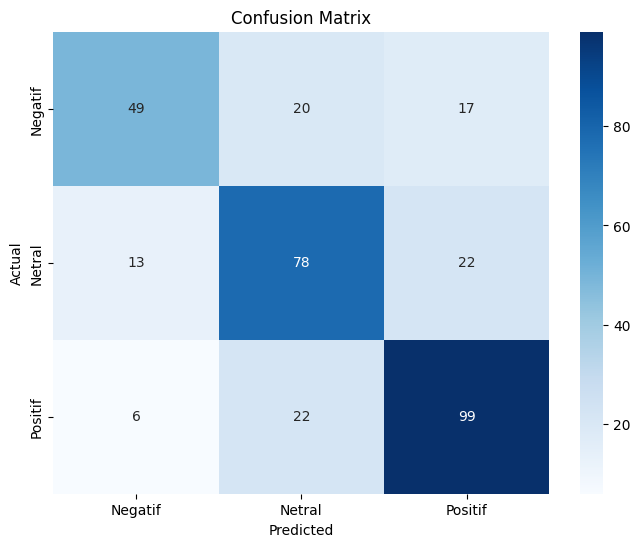

In [31]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your model prediction
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

random forest

In [34]:


from sklearn.ensemble import RandomForestClassifier


# Model training (Random Forest)
model = RandomForestClassifier(random_state=42) # You can adjust hyperparameters here
model.fit(X_train_vec, y_train)

# Model prediction
y_pred = model.predict(X_test_vec)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Function to predict sentiment of new comments
def predict_sentiment(comment):
    comment_vec = vectorizer.transform([comment])
    sentiment = model.predict(comment_vec)[0]
    return sentiment

# Example usage
new_comment = "Komentar baru untuk diuji"
predicted_sentiment = predict_sentiment(new_comment)
print(f"Sentiment of new comment '{new_comment}': {predicted_sentiment}")



Accuracy: 0.7186544342507645
              precision    recall  f1-score   support

     Negatif       0.65      0.59      0.62        71
      Netral       0.73      0.75      0.74       118
     Positif       0.74      0.75      0.75       138

    accuracy                           0.72       327
   macro avg       0.71      0.70      0.70       327
weighted avg       0.72      0.72      0.72       327

Sentiment of new comment 'Komentar baru untuk diuji': Netral


sentimen analys menggunakan VADER

In [ ]:
# Install VADER lexicon
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(text):
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']
    if compound_score >= 0.05:
        return "Positif"
    elif compound_score <= -0.05:
        return "Negatif"
    else:
        return "Netral"

# Apply VADER sentiment analysis to the 'Corrected_Comments' column
data['vader_sentiment'] = data['Corrected_Comments'].apply(analyze_sentiment_vader)

# Display the DataFrame with VADER sentiment analysis results
display(data[['comments', 'Corrected_Comments', 'filtered_tokens_length', 'positive_score', 'negative_score', 'sentiment', 'vader_sentiment']])

# Save the results to a new Excel file
data.to_excel('sentiment_analysis_results_vader.xlsx', index=False)
print("Sentiment analysis results (VADER) saved to sentiment_analysis_results_vader.xlsx")

vader_sentiment_counts = data['vader_sentiment'].value_counts()
print("\nVADER Sentiment Counts:")
vader_sentiment_counts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


,comments,Corrected_Comments,filtered_tokens_length,positive_score,negative_score,sentiment,vader_sentiment
0,Pak tolong PPN pajaknya di turunin soalnya say...,pak tolong ppn pajaknya di turunin soalnya say...,"[pak, tolong, ppn, pajaknya, di, turunin, soal...",7,5,Positif,Netral
1,Smg sehat dan panjang umur pak presiden🔥,semoga sehat dan panjang umur pak presiden🔥,"[semoga, sehat, dan, panjang, umur, pak, presi...",4,0,Positif,Negatif
2,Barng mewah untuk kalangan apa pak 😢 apakah ka...,barng mewah untuk kalangan apa pak 😢 apakah ka...,"[barng, mewah, untuk, kalangan, apa, pak, apak...",0,2,Negatif,Negatif
3,Masa 🫣,masa 🫣,[],0,0,Netral,Netral
4,la nggeh ngoten,la nggeh ngoten,"[la, nggeh, ngoten]",0,0,Netral,Netral
...,...,...,...,...,...,...,...
1629,Usaha rike di tangapi dasco yg yg kena pajak ...,usaha rike di tangapi dasco yang yang kena pa...,"[usaha, rike, di, tangapi, dasco, kena, pajak,...",1,2,Negatif,Netral
1630,Barang mewah adalah ………. \nYang termasuk baran...,barang mewah adalah ………. \nyang termasuk baran...,"[barang, mewah, adalah, termasuk, barang, mewa...",1,2,Negatif,Netral
1631,Lebih ke kendaraan mungkin kalo hp sudah ada P...,lebih ke kendaraan mungkin kalo hp sudah ada p...,"[lebih, ke, kendaraan, mungkin, kalo, hp, suda...",4,1,Positif,Netral
1632,"Semoga benar yg disasar orang kaya, krn pasti ...","semoga benar yang disasar orang kaya, karena p...","[semoga, benar, disasar, orang, kaya, karena, ...",3,1,Positif,Netral


Sentiment analysis results (VADER) saved to sentiment_analysis_results_vader.xlsx

VADER Sentiment Counts:


,count
vader_sentiment,
Netral,1142
Positif,319
Negatif,173
